In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import csv
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
import random
random.seed(5)
from scipy import signal,stats
import os
import seaborn as sns

In [2]:
from datasets_for_tests import DatasetSpgramSyntheticDataTest
from models import SpectroViT
from losses import RangeMAELoss
from main_functions_adapted import run_validation
from metrics import calculate_shape_score, calculate_mse

In [3]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

In [4]:
hop_size = [10,12,14,16,18,20,22,24,26,28,30,32,34,36]
window_size = 256
window = signal.windows.hann(256,sym = True)

In [5]:
spectrovit_10 = SpectroViT().to(device)
spectrovit_10.load_state_dict(torch.load('../model_hop_10_multiplenoise/models/model_hop_10_multiplenoise_best.pt'))
spectrovit_12 = SpectroViT().to(device)
spectrovit_12.load_state_dict(torch.load('../model_hop_12_multiplenoise/models/model_hop_12_multiplenoise_best.pt'))
spectrovit_14 = SpectroViT().to(device)
spectrovit_14.load_state_dict(torch.load('../model_hop_14_multiplenoise/models/model_hop_14_multiplenoise_best.pt'))
spectrovit_16 = SpectroViT().to(device)
spectrovit_16.load_state_dict(torch.load('../model_hop_16_multiplenoise/models/model_hop_16_multiplenoise_best.pt'))
spectrovit_18 = SpectroViT().to(device)
spectrovit_18.load_state_dict(torch.load('../model_hop_18_multiplenoise/models/model_hop_18_multiplenoise_best.pt'))
spectrovit_20 = SpectroViT().to(device)
spectrovit_20.load_state_dict(torch.load('../model_hop_20_multiplenoise/models/model_hop_20_multiplenoise_best.pt'))
spectrovit_22 = SpectroViT().to(device)
spectrovit_22.load_state_dict(torch.load('../model_hop_22_multiplenoise/models/model_hop_22_multiplenoise_best.pt'))
spectrovit_24 = SpectroViT().to(device)
spectrovit_24.load_state_dict(torch.load('../model_hop_24_multiplenoise/models/model_hop_24_multiplenoise_best.pt'))
spectrovit_26 = SpectroViT().to(device)
spectrovit_26.load_state_dict(torch.load('../model_hop_26_multiplenoise/models/model_hop_26_multiplenoise_best.pt'))
spectrovit_28 = SpectroViT().to(device)
spectrovit_28.load_state_dict(torch.load('../model_hop_28_multiplenoise/models/model_hop_28_multiplenoise_best.pt'))
spectrovit_30 = SpectroViT().to(device)
spectrovit_30.load_state_dict(torch.load('../model_hop_30_multiplenoise/models/model_hop_30_multiplenoise_best.pt'))
spectrovit_32 = SpectroViT().to(device)
spectrovit_32.load_state_dict(torch.load('../model_hop_32_multiplenoise/models/model_hop_32_multiplenoise_best.pt'))
spectrovit_34 = SpectroViT().to(device)
spectrovit_34.load_state_dict(torch.load('../model_hop_34_multiplenoise/models/model_hop_34_multiplenoise_best.pt'))
spectrovit_36 = SpectroViT().to(device)
spectrovit_36.load_state_dict(torch.load('../model_hop_36_multiplenoise/models/model_hop_36_multiplenoise_best.pt'))

<All keys matched successfully>

In [6]:
list_models = [spectrovit_10, spectrovit_12, spectrovit_14, spectrovit_16, spectrovit_18, spectrovit_20, 
                spectrovit_22, spectrovit_24, spectrovit_26, spectrovit_28, spectrovit_30, 
                spectrovit_32, spectrovit_34, spectrovit_36]
name_model = ['spectrovit_10','spectrovit_12', 'spectrovit_14', 'spectrovit_16', 'spectrovit_18', 'spectrovit_20',
              'spectrovit_22','spectrovit_24','spectrovit_26','spectrovit_28', 'spectrovit_30',
                'spectrovit_32', 'spectrovit_34', 'spectrovit_36']
dict_metrics = {}
for hop in hop_size:
    dataset_test = DatasetSpgramSyntheticDataTest(path_data='../dataset_test_multiplenoise_from_samples_110_to_200.h5',
                        hop_size=int(hop),window_size=window_size,window=window)
    dataloader_test = DataLoader(dataset_test, batch_size=10, shuffle=False)
    loss = RangeMAELoss()
    epoch = 0
    dict_metrics[str(int(hop))] = {'LossVal': [], 'MSEVal': [], 'SNRVal': [], 'FWHMVal': [], 'ShScVal': []}

    for model in list_models:
        val_loss, loader_mean_mse, loader_mean_snr,loader_mean_linewidth,loader_mean_shape_score,score_challenge = run_validation(model=model, criterion=loss, loader=dataloader_test, epoch=epoch, device=device)
        dict_metrics[str(int(hop))]['LossVal'].append(val_loss)
        dict_metrics[str(int(hop))]['MSEVal'].append(loader_mean_mse)
        dict_metrics[str(int(hop))]['SNRVal'].append(loader_mean_snr)
        dict_metrics[str(int(hop))]['FWHMVal'].append(loader_mean_linewidth)
        dict_metrics[str(int(hop))]['ShScVal'].append(loader_mean_shape_score)

Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 199)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 166)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 142)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 124)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 110)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 99)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 90)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 82)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 76)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 71)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 66)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 62)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 58)
Zero padded to shape:  (1, 224, 224)


Validation Loop:   0%|          | 0/9 [00:00<?, ?it/s]

Generating Spectrograms of size:  (177, 55)
Zero padded to shape:  (1, 224, 224)


Validation Loop: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s, desc=[Epoch 1] Loss: 0.002911488525569439 | MSE:0.0003418 | SNR:301.5496756 | FWHM:0.0764546 | Shape Score:0.9996827] 


In [6]:
predictions = {}
input_spgrams = {}
ppm_concat = np.empty((len(dataset_test),2048))
target_concat = np.empty((len(dataset_test),2048))

list_models = [spectrovit_10.eval(), spectrovit_12.eval(), spectrovit_14.eval(), spectrovit_16.eval(), spectrovit_18.eval(), spectrovit_20.eval(), 
                spectrovit_22.eval(), spectrovit_24.eval(), spectrovit_26.eval(), spectrovit_28.eval(), spectrovit_30.eval(), 
                spectrovit_32.eval(), spectrovit_34.eval(), spectrovit_36.eval()]
name_model = ['spectrovit_10','spectrovit_12', 'spectrovit_14', 'spectrovit_16', 'spectrovit_18', 'spectrovit_20',
              'spectrovit_22','spectrovit_24','spectrovit_26','spectrovit_28', 'spectrovit_30',
                'spectrovit_32', 'spectrovit_34', 'spectrovit_36']
with torch.no_grad():
    for hop_idx,hop in enumerate(hop_size):
        dataset_test = DatasetSpgramSyntheticDataTest(path_data='../dataset_test_multiplenoise_from_samples_110_to_200.h5',
                        hop_size=int(hop),window_size=window_size,window=window)
        dataloader_test = DataLoader(dataset_test, batch_size=10, shuffle=False)
        predictions[str(int(hop))] = {}
        first_batch = True
        count = 0
        for data in dataloader_test:
            if first_batch == True:
                input_, target, ppm = data[0], data[1], data[2]
                input_ = input_.to(device)
                target = target.numpy()
                ppm = ppm.numpy()
                if hop_idx == 0:
                  ppm_concat[count*ppm.shape[0]:(count+1)*ppm.shape[0],:] = ppm
                  target_concat[count*target.shape[0]:(count+1)*target.shape[0],:] = target
                for i,model in enumerate(list_models):
                    prediction = model(input_).cpu().detach().numpy()
                    predictions[str(int(hop))][name_model[i]] = prediction
            
                input_spgram = input_.cpu().detach().numpy()
                input_spgrams[str(int(hop))] = input_spgram
                first_batch = False
                count=count+1
            else:
                input_, target, ppm = data[0], data[1], data[2]
                input_ = input_.to(device)
                target = target.numpy()
                ppm = ppm.numpy()
                if hop_idx == 0:
                  ppm_concat[count*ppm.shape[0]:(count+1)*ppm.shape[0],:] = ppm
                  target_concat[count*target.shape[0]:(count+1)*target.shape[0],:] = target
                for i,model in enumerate(list_models):
                    prediction = model(input_).cpu().detach().numpy()
                    predictions[str(int(hop))][name_model[i]] = np.concatenate((predictions[str(int(hop))][name_model[i]],prediction),axis=0)
            
                input_spgram = input_.cpu().detach().numpy()
                input_spgrams[str(int(hop))] = np.concatenate((input_spgrams[str(int(hop))],input_spgram),axis=0)
                count=count+1

Generating Spectrograms of size:  (177, 199)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 166)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 142)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 124)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 110)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 99)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 90)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 82)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 76)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 71)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 66)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms of size:  (177, 62)
Zero padded to shape:  (1, 224, 224)
Generating Spectrograms

In [13]:
for hop in hop_size:
    print(predictions[str(int(hop))]['spectrovit_'+str(int(hop))].shape)
    print(np.std(predictions[str(int(hop))]['spectrovit_'+str(int(hop))]))

(90, 2048)
0.0579501
(90, 2048)
0.057225604
(90, 2048)
0.057058673
(90, 2048)
0.056852695
(90, 2048)
0.057351198
(90, 2048)
0.058721174
(90, 2048)
0.05748263
(90, 2048)
0.05718884
(90, 2048)
0.057207797
(90, 2048)
0.05666714
(90, 2048)
0.057266
(90, 2048)
0.057335805
(90, 2048)
0.056796398
(90, 2048)
0.05714019


In [8]:
def order_models(list_metric,model_names):
    values_order = np.sort(np.array(list_metric))
    idx_values_order = np.argsort(np.array(list_metric))
    models_ordered = []
    for idx in idx_values_order:
        models_ordered.append(model_names[idx]) 
    return models_ordered, values_order

In [36]:
metrics_names = ['LossVal','MSEVal','SNRVal','FWHMVal','ShScVal']
results_for_their_right_hop = {}
for metric in metrics_names:
        results_for_their_right_hop[metric] = [[],[]]
        aux = []
        for idx,model in enumerate(name_model):
                aux.append(dict_metrics[str(int(hop_size[idx]))][metric][idx])
        aux_model, aux_value = order_models(list_metric=aux,model_names=name_model)
        if metric == 'SNRVal' or metric == 'ShScVal':
                results_for_their_right_hop[metric][0] = aux_model[::-1]
                results_for_their_right_hop[metric][1] = np.flip(aux_value)
        else:
                results_for_their_right_hop[metric][0] = aux_model
                results_for_their_right_hop[metric][1] = aux_value
print('|..............LossVal.......|..............MSEVal........|..............SNRVal........|..............FWHMVal.......|..............ShScVal.......|')
for line_idx in range(len(name_model)):
        str_aux = ""
        for metric_idx,metric in enumerate(metrics_names):
                if metric_idx == 0:
                        str_aux = '| '+results_for_their_right_hop[metric][0][line_idx]+' | '+'{:.4E}'.format(results_for_their_right_hop[metric][1][line_idx])+' | ' 
                else:
                        str_aux = str_aux + results_for_their_right_hop[metric][0][line_idx]+' | '+'{:.4E}'.format(results_for_their_right_hop[metric][1][line_idx])+' | ' 
        print(str_aux)

|..............LossVal.......|..............MSEVal........|..............SNRVal........|..............FWHMVal.......|..............ShScVal.......|
| spectrovit_14 | 2.5954E-03 | spectrovit_20 | 3.2853E-04 | spectrovit_32 | 3.7944E+02 | spectrovit_10 | 7.6455E-02 | spectrovit_18 | 9.9971E-01 | 
| spectrovit_22 | 2.7771E-03 | spectrovit_28 | 3.3022E-04 | spectrovit_28 | 3.6047E+02 | spectrovit_12 | 7.6455E-02 | spectrovit_24 | 9.9971E-01 | 
| spectrovit_12 | 2.7816E-03 | spectrovit_12 | 3.3276E-04 | spectrovit_18 | 3.4625E+02 | spectrovit_14 | 7.6455E-02 | spectrovit_14 | 9.9970E-01 | 
| spectrovit_26 | 2.8053E-03 | spectrovit_30 | 3.3297E-04 | spectrovit_34 | 3.4408E+02 | spectrovit_16 | 7.6455E-02 | spectrovit_10 | 9.9970E-01 | 
| spectrovit_32 | 2.8253E-03 | spectrovit_18 | 3.3501E-04 | spectrovit_26 | 3.4022E+02 | spectrovit_18 | 7.6455E-02 | spectrovit_12 | 9.9970E-01 | 
| spectrovit_18 | 2.8429E-03 | spectrovit_16 | 3.3606E-04 | spectrovit_24 | 3.3649E+02 | spectrovit_20 | 7.6455E-

In [34]:
score_point = np.array([14,13,12,11,10,9,8,7,6,5,4,3,2,1])
score_model_for_their_right_hop = {}
for model in name_model:
    score_model_for_their_right_hop[model] = 0
for metric in metrics_names:
    if metric != 'LossVal':
        if metric != 'FWHMVal':
            for model_idx in range(len(results_for_their_right_hop[metric][0])):
                score_model_for_their_right_hop[results_for_their_right_hop[metric][0][model_idx]] = score_model_for_their_right_hop[results_for_their_right_hop[metric][0][model_idx]] + score_point[model_idx]
        else:
            no_repet = np.unique(results_for_their_right_hop[metric][1])
            max_point = len(no_repet)
            for model_idx in range(len(results_for_their_right_hop[metric][0])):
                if model_idx == 0:
                    add_to_score = max_point
                else:
                    if results_for_their_right_hop[metric][1][model_idx] != results_for_their_right_hop[metric][1][model_idx-1]:
                        add_to_score = add_to_score-1
                score_model_for_their_right_hop[results_for_their_right_hop[metric][0][model_idx]] = score_model_for_their_right_hop[results_for_their_right_hop[metric][0][model_idx]] + add_to_score
aux = []
for model in name_model:
    aux.append(score_model_for_their_right_hop[model])
models_scored_for_their_right_hop, models_score_value_for_their_right_hop = order_models(list_metric=aux,model_names=name_model)
for i in reversed(range(len(models_scored_for_their_right_hop))):
    print(models_scored_for_their_right_hop[i] + ': '+str(models_score_value_for_their_right_hop[i]))

spectrovit_18: 37
spectrovit_28: 31
spectrovit_12: 31
spectrovit_24: 30
spectrovit_32: 25
spectrovit_34: 24
spectrovit_14: 24
spectrovit_30: 23
spectrovit_26: 23
spectrovit_20: 18
spectrovit_10: 18
spectrovit_22: 17
spectrovit_36: 15
spectrovit_16: 13


In [37]:
results_for_each_hop = {}
for hop in hop_size:
    results_for_each_hop[str(int(hop))] = {}
    for metric in metrics_names:
        results_for_each_hop[str(int(hop))][metric] = [[],[]]
        aux_model,aux_value = order_models(list_metric=dict_metrics[str(int(hop))][metric],model_names=name_model)
        if metric == 'SNRVal' or metric == 'ShScVal':
            results_for_each_hop[str(int(hop))][metric][0] = aux_model[::-1]
            results_for_each_hop[str(int(hop))][metric][1] = np.flip(aux_value)
        else:
            results_for_each_hop[str(int(hop))][metric][0] = aux_model
            results_for_each_hop[str(int(hop))][metric][1] = aux_value

In [38]:
score_point = np.array([14,13,12,11,10,9,8,7,6,5,4,3,2,1])
score_model_combined_hops = {}
for name in name_model:
    score_model_combined_hops[name] = [0,0,0,0,0]
for metric_idx, metric in enumerate(metrics_names):
    for hop in hop_size:
        if metric != 'FWHMVal':
            for model_idx in range(len(results_for_each_hop[str(int(hop))][metric][0])):
                model_ref = results_for_each_hop[str(int(hop))][metric][0][model_idx]
                score_model_combined_hops[model_ref][metric_idx] = score_model_combined_hops[model_ref][metric_idx] + score_point[model_idx]
        else:
            no_repet = np.unique(results_for_each_hop[str(int(hop))][metric][1])
            max_point = len(no_repet)
            for model_idx in range(len(results_for_each_hop[str(int(hop))][metric][0])):
                model_ref = results_for_each_hop[str(int(hop))][metric][0][model_idx]
                if model_idx == 0:
                    add_to_score = max_point
                else:
                    if results_for_each_hop[str(int(hop))][metric][1][model_idx] != results_for_each_hop[str(int(hop))][metric][1][model_idx-1]: 
                        add_to_score = add_to_score-1                     
                score_model_combined_hops[model_ref][metric_idx] = score_model_combined_hops[model_ref][metric_idx] + add_to_score

to_print_results = {}
for metric_idx, metric in enumerate(metrics_names):
    aux = []
    for model in name_model:
        aux.append(score_model_combined_hops[model][metric_idx])
    aux_model, aux_value = order_models(list_metric=aux,model_names=name_model)
    to_print_results[metric] = [aux_model[::-1],np.flip(aux_value)]
print('|.......LossVal.......|.......MSEVal........|.......SNRVal........|.......FWHMVal.......|.......ShScVal.......|')
for line_idx in range(len(name_model)):
    str_aux = ""
    for metric_idx,metric in enumerate(metrics_names):
            if len(str(to_print_results[metric][1][line_idx])) == 2:
                space = '  | '
            else:
                space = ' | '
            if metric_idx == 0:
                str_aux = '| '+to_print_results[metric][0][line_idx]+' | '+str(to_print_results[metric][1][line_idx])+space 
            else:
                str_aux = str_aux + to_print_results[metric][0][line_idx]+' | '+str(to_print_results[metric][1][line_idx])+space
    print(str_aux)

|.......LossVal.......|.......MSEVal........|.......SNRVal........|.......FWHMVal.......|.......ShScVal.......|
| spectrovit_10 | 158 | spectrovit_16 | 161 | spectrovit_10 | 176 | spectrovit_36 | 15  | spectrovit_10 | 185 | 
| spectrovit_20 | 133 | spectrovit_26 | 148 | spectrovit_26 | 147 | spectrovit_34 | 15  | spectrovit_22 | 146 | 
| spectrovit_34 | 124 | spectrovit_30 | 144 | spectrovit_36 | 137 | spectrovit_32 | 15  | spectrovit_26 | 131 | 
| spectrovit_26 | 124 | spectrovit_22 | 129 | spectrovit_28 | 132 | spectrovit_28 | 15  | spectrovit_34 | 123 | 
| spectrovit_36 | 117 | spectrovit_20 | 113 | spectrovit_34 | 130 | spectrovit_26 | 15  | spectrovit_30 | 119 | 
| spectrovit_32 | 110 | spectrovit_28 | 109 | spectrovit_32 | 128 | spectrovit_24 | 15  | spectrovit_12 | 118 | 
| spectrovit_16 | 103 | spectrovit_36 | 105 | spectrovit_30 | 122 | spectrovit_22 | 15  | spectrovit_24 | 117 | 
| spectrovit_22 | 102 | spectrovit_18 | 96  | spectrovit_12 | 113 | spectrovit_20 | 15  | spectro

In [39]:
total_score_models = []
for model in name_model:
    total_score_models.append(np.sum(np.array(score_model_combined_hops[model][1:])))
aux_model,aux_value = order_models(list_metric=total_score_models,model_names=name_model)
for i in reversed(range(len(aux_model))):
    print(aux_model[i]+': '+str(aux_value[i]))

spectrovit_10: 447
spectrovit_26: 441
spectrovit_30: 399
spectrovit_22: 390
spectrovit_36: 362
spectrovit_28: 350
spectrovit_12: 341
spectrovit_34: 338
spectrovit_32: 323
spectrovit_24: 284
spectrovit_18: 274
spectrovit_14: 261
spectrovit_16: 230
spectrovit_20: 179


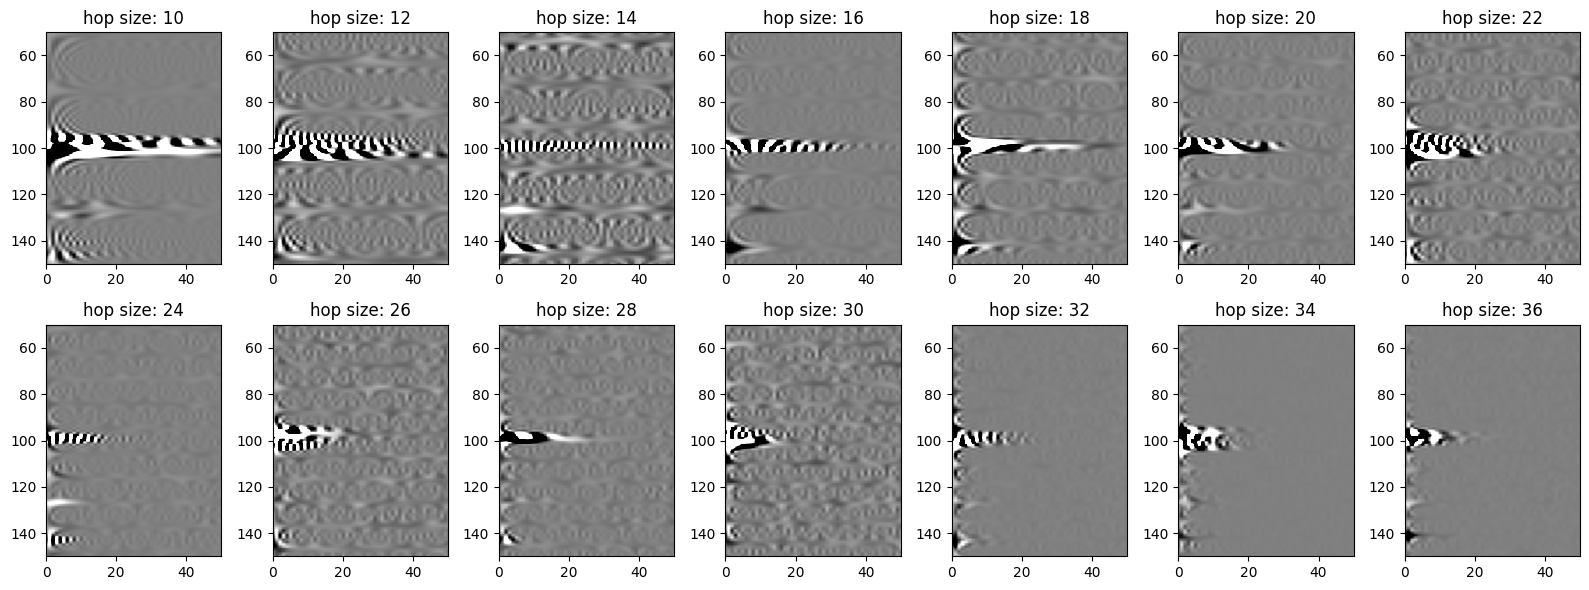

In [14]:
fig,ax = plt.subplots(2,7,figsize=(16,6))
for i,hop in enumerate(hop_size):
    ax.flat[i].imshow(input_spgrams[str(int(hop))][0,0,:,:],cmap='gray',vmin=-0.04,vmax=0.04,aspect='auto')
    ax.flat[i].set_title('hop size: '+str(int(hop)))
    ax.flat[i].set_ylim(150,50)
    ax.flat[i].set_xlim(0,50)
plt.tight_layout()
#plt.savefig('compare_models_synthdata_spgrams')


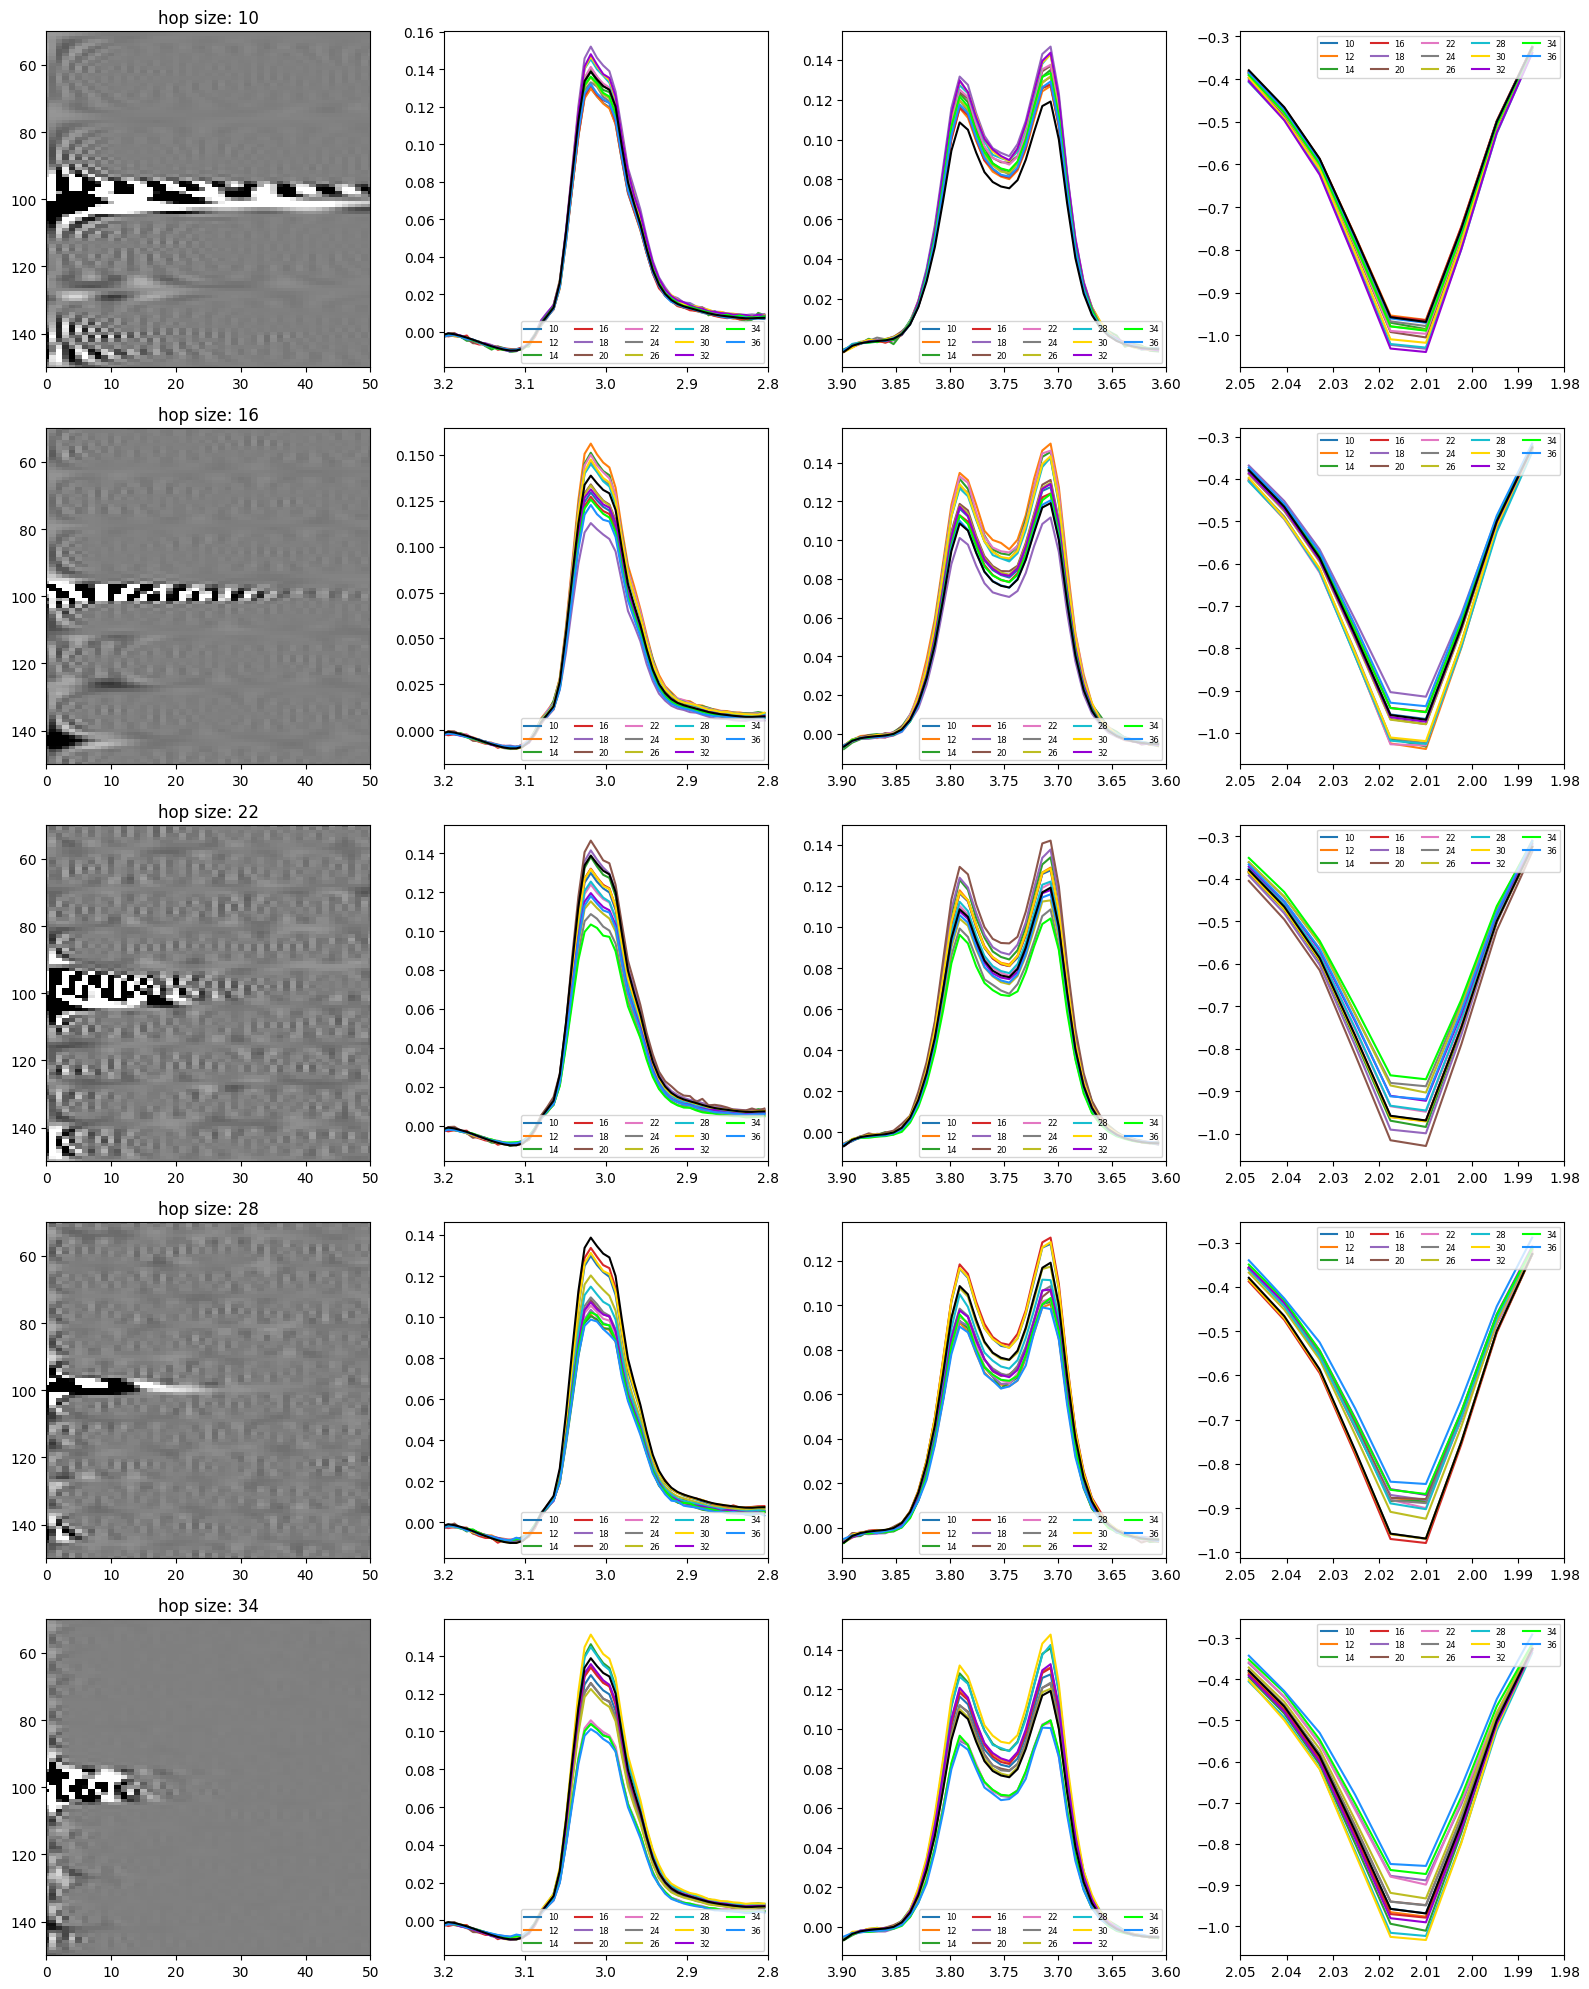

In [15]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
          'gold', 'darkviolet', 'lime', 'dodgerblue']
idx_to_plot=0
hop_idx_to_plot = [0,3,6,9,12]
fig,ax = plt.subplots(5,4,figsize=(16,20))
for k in range(len(hop_idx_to_plot)):
    ax.flat[4*k].imshow(input_spgrams[str(hop_size[hop_idx_to_plot[k]])][idx_to_plot,0,:,:],cmap='gray',vmin=-0.04,vmax=0.04,aspect='auto')
    ax.flat[4*k].set_title('hop size: '+str(hop_size[hop_idx_to_plot[k]]))
    ax.flat[4*k].set_ylim(150,50)
    ax.flat[4*k].set_xlim(0,50)
    regions = [[2.8,3.2],[3.6,3.9],[1.98,2.05]]
    for j in range(3):
        position_sup = np.abs(ppm[idx_to_plot,:]-regions[j][-1]).argmin()
        position_inf = np.abs(ppm[idx_to_plot,:]-regions[j][0]).argmin()
        for i in range(14):
            ax.flat[4*k+(j+1)].plot(ppm[idx_to_plot,position_sup:position_inf], predictions[str(hop_size[hop_idx_to_plot[k]])][name_model[i]][idx_to_plot,position_sup:position_inf], label=name_model[i][-2:],color=colors[i])
        if j <2:
            ax.flat[4*k+(j+1)].legend(loc='lower right',fontsize=6,ncols=5)
        else:
            ax.flat[4*k+(j+1)].legend(loc='upper right',fontsize=6,ncols=5)
        ax.flat[4*k+(j+1)].plot(ppm[idx_to_plot,position_sup:position_inf],target[idx_to_plot,position_sup:position_inf], color='black')
        ax.flat[4*k+(j+1)].set_xlim(regions[j][-1],regions[j][0])
plt.tight_layout()
#plt.savefig('compare_models_synthdata_reconstructionplots')

In [16]:
height_diff_per_hop = {'GABA':{},'Glx':{},'NAA':{}}
regions = [[2.8,3.2],[3.6,3.9],[1.98,2.05]]
for hop in hop_size:
    for j in range(3):
        height_diff_per_hop[list(height_diff_per_hop.keys())[j]][str(int(hop))] = []
        diff_height = {}
        for model in name_model:
            diff_height[model] = []
        for q in range(ppm.shape[0]):
            position_sup = np.abs(ppm[q,:]-regions[j][-1]).argmin()
            position_inf = np.abs(ppm[q,:]-regions[j][0]).argmin()
            tgt_height = np.max(np.abs(target[q,position_sup:position_inf]))
            for model in name_model:
                diff_height[model].append(np.max(np.abs(predictions[str(int(hop))][model][q,position_sup:position_inf]))-tgt_height)
        for model in name_model:
            aux = np.mean(np.array(diff_height[model]))
            height_diff_per_hop[list(height_diff_per_hop.keys())[j]][str(int(hop))].append(aux)

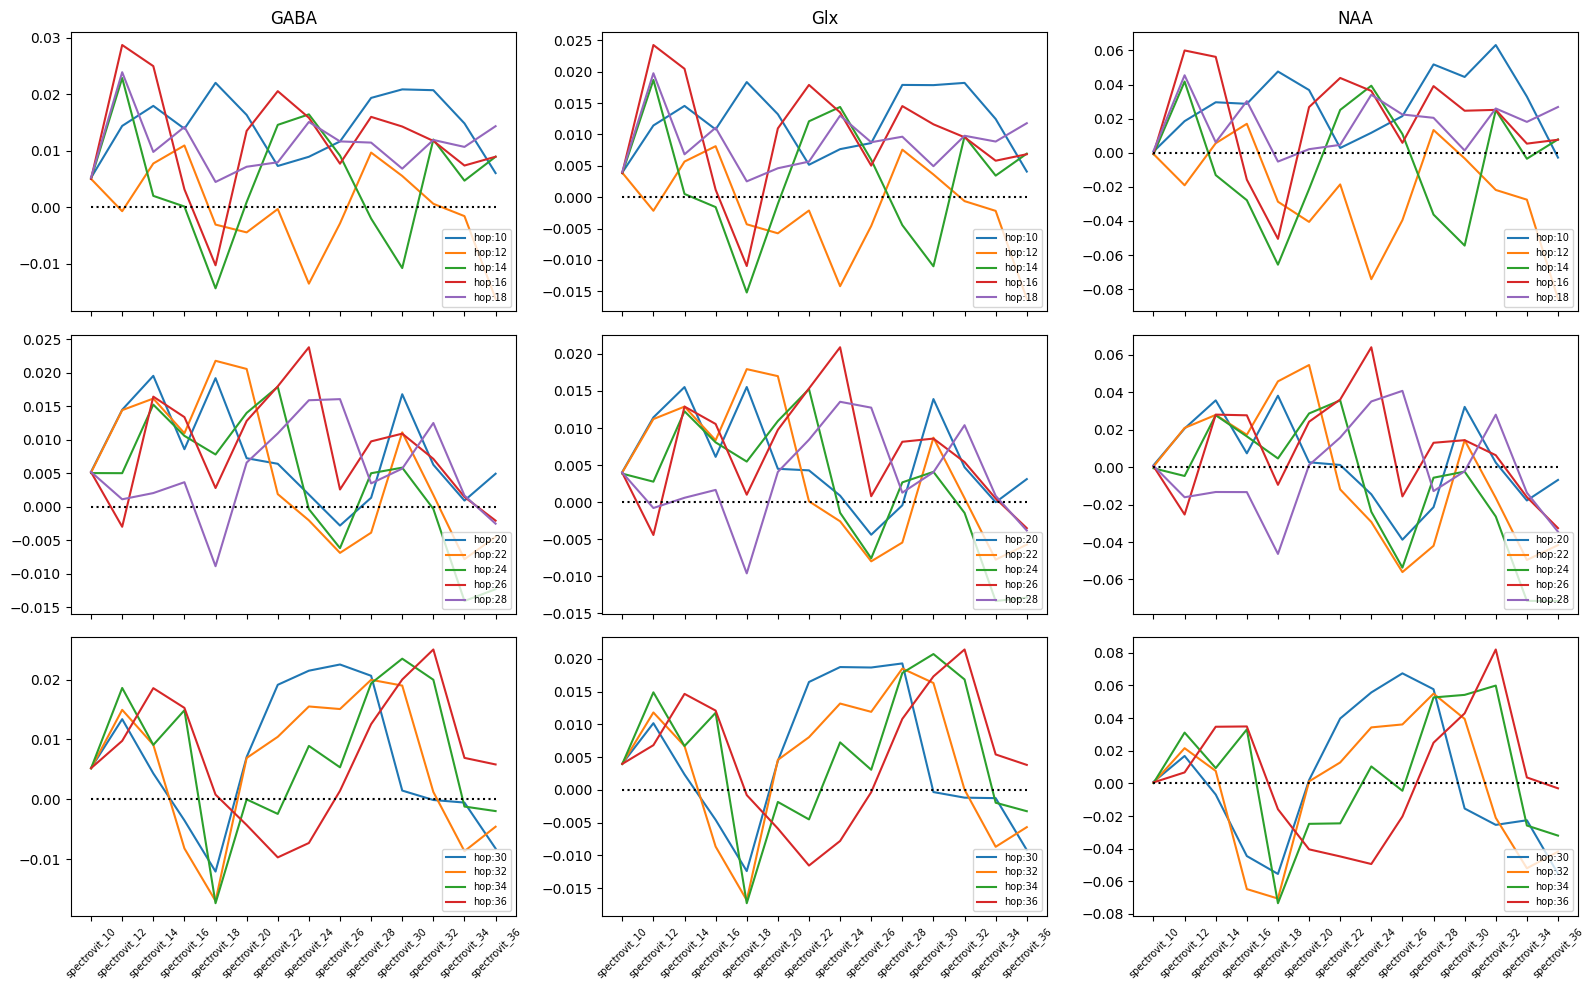

In [40]:
fig, ax = plt.subplots(3,3,figsize=(16,10),sharex='col')
for idx,key in enumerate(list(height_diff_per_hop.keys())):
    for hop in [10,12,14,16,18]:
        ax.flat[idx].plot(name_model,height_diff_per_hop[key][str(int(hop))],label='hop:'+str(int(hop)))
    for hop in [20,22,24,26,28]:
        ax.flat[idx+3].plot(name_model,height_diff_per_hop[key][str(int(hop))],label='hop:'+str(int(hop)))
    for hop in [30,32,34,36]:
        ax.flat[idx+6].plot(name_model,height_diff_per_hop[key][str(int(hop))],label='hop:'+str(int(hop)))
for i in range(9):
    ax.flat[i].plot(name_model,np.zeros(14),color='black',linestyle='dotted')
    ax.flat[i].set_xticks(ticks=name_model,labels=name_model,rotation=45,fontsize=7)
    ax.flat[i].legend(loc='lower right',fontsize=7)
ax.flat[0].set_title('GABA')
ax.flat[1].set_title('Glx')
ax.flat[2].set_title('NAA')
plt.tight_layout()

In [18]:
print('|..........GABA........|..............Glx.....|..............NAA.....|')
for line_idx in range(len(name_model)):
    str_aux = ""
    for idx,key in enumerate(list(height_diff_per_hop.keys())):
        counter_pos = 0
        counter_neg = 0
        for hop in hop_size:
            if height_diff_per_hop[key][str(int(hop))][line_idx] >= 0:
                counter_pos=counter_pos+1
            else:
                counter_neg=counter_neg+1
        if len(str(counter_neg))==1 and len(str(counter_pos))==1:
            space='   |'
        elif (len(str(counter_neg))==2 and len(str(counter_pos))==1) or (len(str(counter_neg))==1 and len(str(counter_pos))==2):
            space='  |'
        else:
            space=' |'
        if idx == 0:
            str_aux = str_aux + '|'+name_model[line_idx]+' | '+str(counter_pos)+'/'+str(counter_neg)+space
        else:
            str_aux = str_aux + name_model[line_idx]+' | '+str(counter_pos)+'/'+str(counter_neg)+space
    print(str_aux)

|..........GABA........|..............Glx.....|..............NAA.....|
|spectrovit_10 | 14/0  |spectrovit_10 | 14/0  |spectrovit_10 | 10/4  |
|spectrovit_12 | 12/2  |spectrovit_12 | 11/3  |spectrovit_12 | 10/4  |
|spectrovit_14 | 14/0  |spectrovit_14 | 14/0  |spectrovit_14 | 11/3  |
|spectrovit_16 | 12/2  |spectrovit_16 | 11/3  |spectrovit_16 | 9/5   |
|spectrovit_18 | 7/7   |spectrovit_18 | 6/8   |spectrovit_18 | 4/10  |
|spectrovit_20 | 11/3  |spectrovit_20 | 10/4  |spectrovit_20 | 10/4  |
|spectrovit_22 | 11/3  |spectrovit_22 | 11/3  |spectrovit_22 | 10/4  |
|spectrovit_24 | 10/4  |spectrovit_24 | 10/4  |spectrovit_24 | 9/5   |
|spectrovit_26 | 10/4  |spectrovit_26 | 9/5   |spectrovit_26 | 7/7   |
|spectrovit_28 | 12/2  |spectrovit_28 | 11/3  |spectrovit_28 | 9/5   |
|spectrovit_30 | 13/1  |spectrovit_30 | 12/2  |spectrovit_30 | 9/5   |
|spectrovit_32 | 12/2  |spectrovit_32 | 11/3  |spectrovit_32 | 9/5   |
|spectrovit_34 | 8/6   |spectrovit_34 | 7/7   |spectrovit_34 | 4/10  |
|spect

In [41]:
print('|..............GABA..........|..............Glx...........|..............NAA...........|')
for line_idx in range(len(name_model)):
    str_aux = ""
    for idx,key in enumerate(list(height_diff_per_hop.keys())):
        if height_diff_per_hop[key][str(int(hop_size[line_idx]))][line_idx] > 0: 
            space = '  |'
        else:
            space = ' |'
        if idx == 0:
            str_aux = str_aux + '|'+name_model[line_idx]+' | '+'{:.4E}'.format(height_diff_per_hop[key][str(int(hop_size[line_idx]))][line_idx])+space
        else:
            str_aux = str_aux + name_model[line_idx]+' | '+'{:.4E}'.format(height_diff_per_hop[key][str(int(hop_size[line_idx]))][line_idx])+space
    print(str_aux)

|..............GABA..........|..............Glx...........|..............NAA...........|
|spectrovit_10 | 5.2103E-03  |spectrovit_10 | 3.9310E-03  |spectrovit_10 | 6.7964E-04  |
|spectrovit_12 | -7.1951E-04 |spectrovit_12 | -2.1627E-03 |spectrovit_12 | -1.9066E-02 |
|spectrovit_14 | 1.9970E-03  |spectrovit_14 | 5.1528E-04  |spectrovit_14 | -1.3106E-02 |
|spectrovit_16 | 3.1578E-03  |spectrovit_16 | 1.1969E-03  |spectrovit_16 | -1.5766E-02 |
|spectrovit_18 | 4.4614E-03  |spectrovit_18 | 2.5263E-03  |spectrovit_18 | -5.1672E-03 |
|spectrovit_20 | 7.2573E-03  |spectrovit_20 | 4.4920E-03  |spectrovit_20 | 2.5916E-03  |
|spectrovit_22 | 1.8918E-03  |spectrovit_22 | 1.0656E-04  |spectrovit_22 | -1.1902E-02 |
|spectrovit_24 | -3.5064E-04 |spectrovit_24 | -1.4421E-03 |spectrovit_24 | -2.3842E-02 |
|spectrovit_26 | 2.5845E-03  |spectrovit_26 | 7.9029E-04  |spectrovit_26 | -1.5648E-02 |
|spectrovit_28 | 3.4967E-03  |spectrovit_28 | 1.2735E-03  |spectrovit_28 | -1.2805E-02 |
|spectrovit_30 | 1.43

In [42]:
proximity_shape_score = np.empty((14,14))
proximity_MSE = np.empty((14,14))
for model_idx,model in enumerate(name_model):
    aux_tgt = predictions[str(int(hop_size[model_idx]))][model]
    for model_idx_aux,model_aux in enumerate(name_model):
        if model_aux != model:
            aux = predictions[str(int(hop_size[model_idx]))][model_aux]
            aux_ss = []
            aux_mse = []
            for q in range(ppm.shape[0]):
                aux_ss.append(calculate_shape_score(x=aux[q,:], y=aux_tgt[q,:], ppm=ppm[q,:]))
                aux_mse.append(calculate_mse(x=aux[q,:], y=aux_tgt[q,:], ppm=ppm[q,:]))
            proximity_shape_score[model_idx,model_idx_aux] = np.mean(np.array(aux_ss))
            proximity_MSE[model_idx,model_idx_aux] = np.mean(np.array(aux_mse))
        else:
            proximity_shape_score[model_idx,model_idx_aux] = 1
            proximity_MSE[model_idx,model_idx_aux] = 0

preds_flatten = {}
for j,name in enumerate(name_model):
    for i,hop in enumerate(hop_size):
        if i == 0:
            preds_flatten[name] = predictions[str(int(hop))][name].flatten()
        else:
            preds_flatten[name] = np.concatenate((preds_flatten[name],predictions[str(int(hop))][name].flatten()))

    if j == 0:
        data = preds_flatten[name]
    else:
        data = np.vstack([data,preds_flatten[name]])
correlation_matrix = np.corrcoef(data)

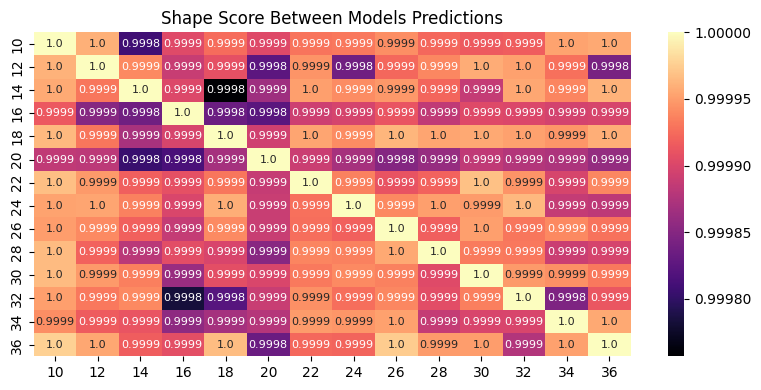

In [43]:
plt.figure(figsize=(8,4))
sns.heatmap(proximity_shape_score, annot=True, annot_kws={"size": 8}, fmt='.4', cmap='magma', xticklabels=['10','12', '14', '16', '18', '20', '22','24','26','28', '30', '32', '34', '36'], 
            yticklabels=['10','12', '14', '16', '18', '20', '22','24','26','28', '30', '32', '34', '36'])
plt.title('Shape Score Between Models Predictions')
plt.tight_layout()

In [44]:
for line_idx in range(proximity_shape_score.shape[0]):
    aux_model,aux_value = order_models(list_metric=proximity_shape_score[line_idx,:],model_names=name_model)
    print(name_model[line_idx]+': '+(aux_model[::-1])[1]+' | '+(aux_model[::-1])[2])

spectrovit_10: spectrovit_12 | spectrovit_36
spectrovit_12: spectrovit_10 | spectrovit_30
spectrovit_14: spectrovit_36 | spectrovit_10
spectrovit_16: spectrovit_10 | spectrovit_26
spectrovit_18: spectrovit_10 | spectrovit_26
spectrovit_20: spectrovit_22 | spectrovit_30
spectrovit_22: spectrovit_30 | spectrovit_10
spectrovit_24: spectrovit_32 | spectrovit_18
spectrovit_26: spectrovit_30 | spectrovit_10
spectrovit_28: spectrovit_10 | spectrovit_26
spectrovit_30: spectrovit_10 | spectrovit_32
spectrovit_32: spectrovit_10 | spectrovit_22
spectrovit_34: spectrovit_36 | spectrovit_26
spectrovit_36: spectrovit_10 | spectrovit_26


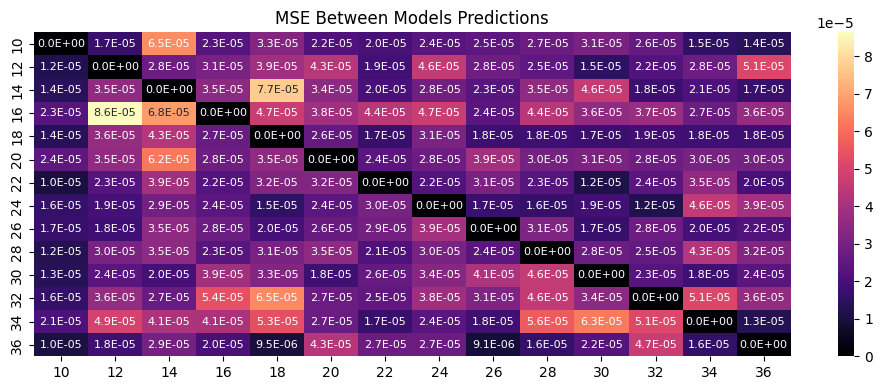

In [45]:
plt.figure(figsize=(10,4))
sns.heatmap(proximity_MSE, annot=True, annot_kws={"size": 8}, fmt='.1E', cmap='magma', xticklabels=['10','12', '14', '16', '18', '20', '22','24','26','28', '30', '32', '34', '36'], 
            yticklabels=['10','12', '14', '16', '18', '20', '22','24','26','28', '30', '32', '34', '36'])
plt.title('MSE Between Models Predictions')
plt.tight_layout()

In [46]:
for line_idx in range(proximity_MSE.shape[0]):
    aux_model,aux_value = order_models(list_metric=proximity_MSE[line_idx,:],model_names=name_model)
    print(name_model[line_idx]+': '+(aux_model)[1]+' | '+(aux_model)[2])

spectrovit_10: spectrovit_36 | spectrovit_34
spectrovit_12: spectrovit_10 | spectrovit_30
spectrovit_14: spectrovit_10 | spectrovit_36
spectrovit_16: spectrovit_10 | spectrovit_26
spectrovit_18: spectrovit_10 | spectrovit_22
spectrovit_20: spectrovit_22 | spectrovit_10
spectrovit_22: spectrovit_10 | spectrovit_30
spectrovit_24: spectrovit_32 | spectrovit_18
spectrovit_26: spectrovit_10 | spectrovit_30
spectrovit_28: spectrovit_10 | spectrovit_22
spectrovit_30: spectrovit_10 | spectrovit_20
spectrovit_32: spectrovit_10 | spectrovit_22
spectrovit_34: spectrovit_36 | spectrovit_22
spectrovit_36: spectrovit_26 | spectrovit_18


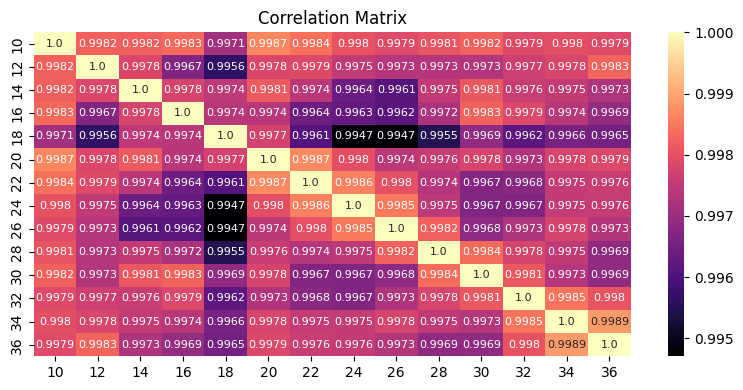

In [47]:
plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, fmt='.4', cmap='magma', xticklabels=['10','12', '14', '16', '18', '20', '22','24','26','28', '30', '32', '34', '36'], 
            yticklabels=['10','12', '14', '16', '18', '20', '22','24','26','28', '30', '32', '34', '36'])
plt.title('Correlation Matrix')
plt.tight_layout()

In [48]:
for line_idx in range(correlation_matrix.shape[0]):
    aux_model,aux_value = order_models(list_metric=correlation_matrix[line_idx,:],model_names=name_model)
    print(name_model[line_idx]+': '+(aux_model[::-1])[1]+' | '+(aux_model[::-1])[2])

spectrovit_10: spectrovit_20 | spectrovit_22
spectrovit_12: spectrovit_36 | spectrovit_10
spectrovit_14: spectrovit_10 | spectrovit_20
spectrovit_16: spectrovit_10 | spectrovit_30
spectrovit_18: spectrovit_20 | spectrovit_14
spectrovit_20: spectrovit_22 | spectrovit_10
spectrovit_22: spectrovit_20 | spectrovit_24
spectrovit_24: spectrovit_22 | spectrovit_26
spectrovit_26: spectrovit_24 | spectrovit_28
spectrovit_28: spectrovit_30 | spectrovit_26
spectrovit_30: spectrovit_28 | spectrovit_16
spectrovit_32: spectrovit_34 | spectrovit_30
spectrovit_34: spectrovit_36 | spectrovit_32
spectrovit_36: spectrovit_34 | spectrovit_12


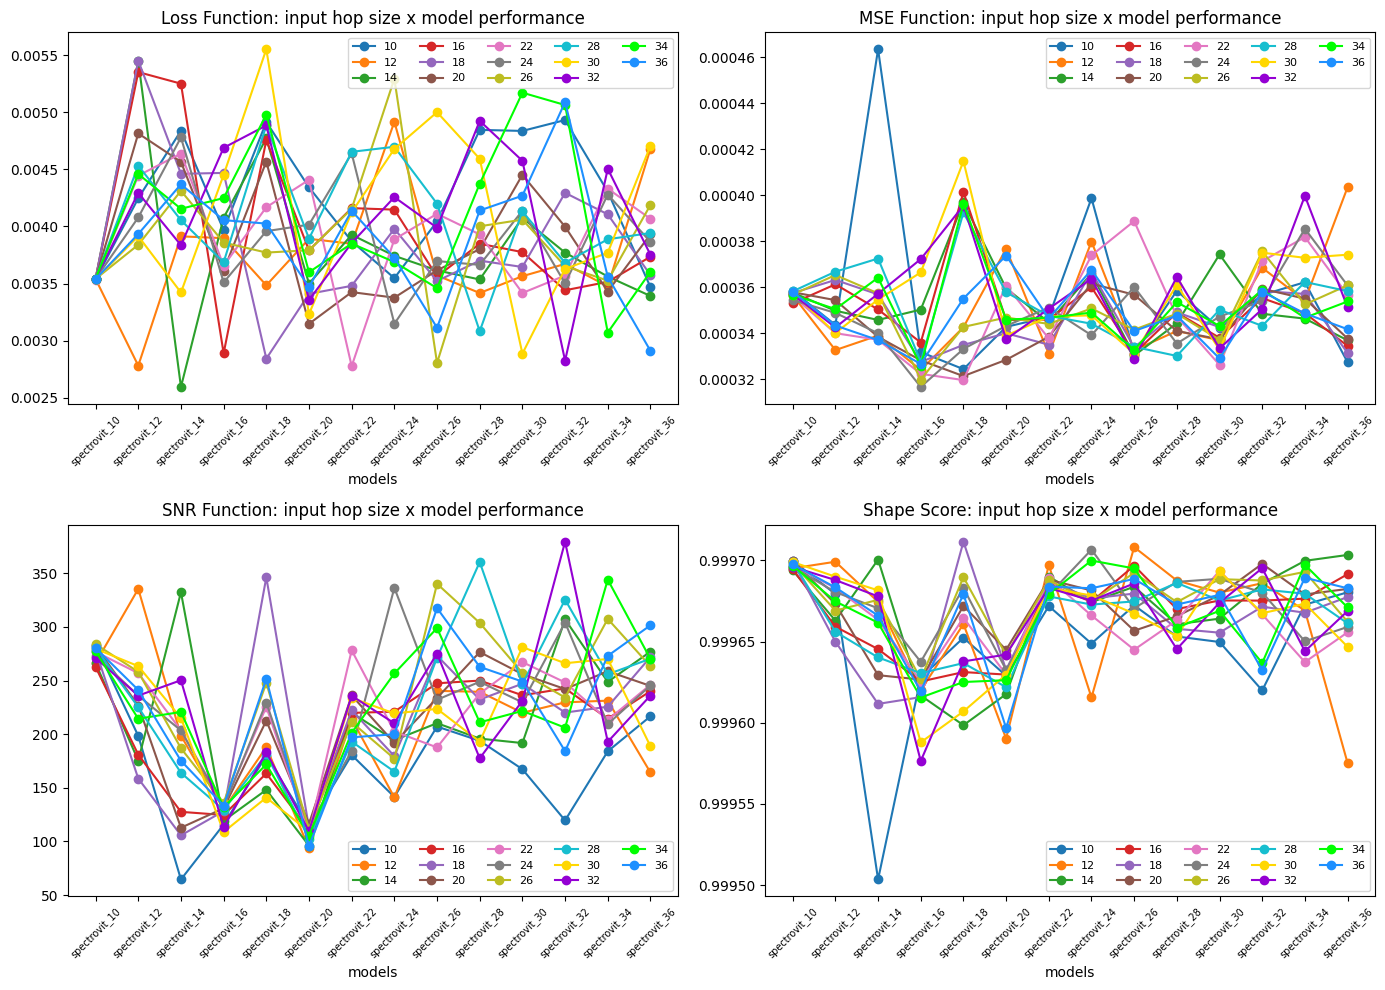

In [27]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
          'gold', 'darkviolet', 'lime', 'dodgerblue']
fig,ax = plt.subplots(2,2,figsize=(14,10))
metrics_names = ['LossVal','MSEVal','SNRVal','ShScVal']
for j,metric in enumerate(metrics_names):
    for i,hop in enumerate(hop_size):
        ax.flat[j].plot(name_model, dict_metrics[str(int(hop))][metric],marker='o',label=str(int(hop)), color=colors[i])
    if j<2:
        ax.flat[j].legend(loc='upper right',fontsize=8, ncols=5)
    else:
        ax.flat[j].legend(loc='lower right',fontsize=8, ncols=5)
    ax.flat[j].set_xticks(ticks=name_model,labels=name_model,rotation=45,fontsize=7)
    ax.flat[j].set_xlabel('models')
    if j == 0: 
        ax.flat[j].set_title('Loss Function: input hop size x model performance')
    elif j == 1: 
        ax.flat[j].set_title('MSE Function: input hop size x model performance')
    elif j == 2: 
        ax.flat[j].set_title('SNR Function: input hop size x model performance')
    else:
        ax.flat[j].set_title('Shape Score: input hop size x model performance')
plt.tight_layout()
#plt.savefig('compare_models_synthdata_inputhop_x_model')

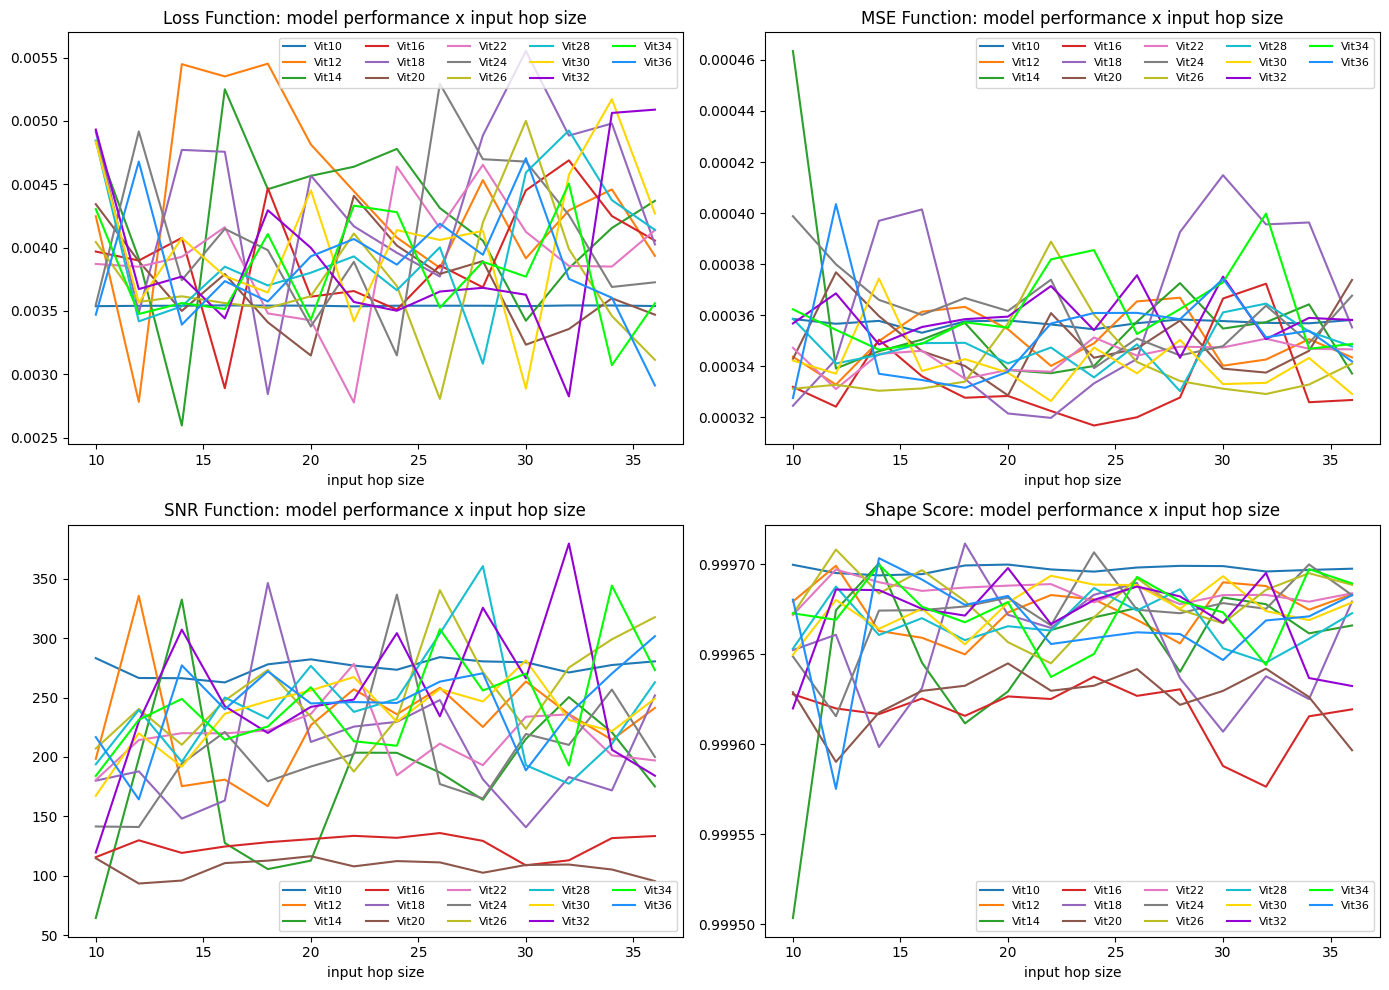

In [28]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
          'gold', 'darkviolet', 'lime', 'dodgerblue']
fig,ax = plt.subplots(2,2,figsize=(14,10))
metrics_names = ['LossVal','MSEVal','SNRVal','ShScVal']
for j,metric in enumerate(metrics_names):
    for i,model in enumerate(name_model):
        aux = []
        for hop in hop_size:
            aux.append(dict_metrics[str(int(hop))][metric][i])
        ax.flat[j].plot(hop_size,aux,label='Vit'+model[11:], color=colors[i])
    if j<2:
        ax.flat[j].legend(loc='upper right',fontsize=8, ncols=5)
    else:
        ax.flat[j].legend(loc='lower right',fontsize=8, ncols=5)
    ax.flat[j].set_xlabel('input hop size')
    if j == 0: 
        ax.flat[j].set_title('Loss Function: model performance x input hop size')
    elif j == 1: 
        ax.flat[j].set_title('MSE Function: model performance x input hop size')
    elif j == 2: 
        ax.flat[j].set_title('SNR Function: model performance x input hop size')
    else:
        ax.flat[j].set_title('Shape Score: model performance x input hop size')
plt.tight_layout()
#plt.savefig('compare_models_synthdata_model_x_inputhop')